# Query data from NASA database and compare with own integrations.
Starting date: 01/01/2022.

---
Integrated 40 years.

Charon + 4 small moons.

by cristian.giuppone@unc.edu.ar Updated: 27/10/2021

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
import pandas
plt.style.use('default')



In [2]:
# https://www.iau.org/public/themes/measuring/ 
uam     = 1.495978707e11
c       = 2.99792458e8/uam #m/s/uam == ua/s
twopi   = pi*2
dy     = 365.25
k      = 1.720209895e-02
G      = k*k # Para ua, dias, msol
mearth = 3.04043e-6       # earth mass in solar masses
mjup   = 9.54792e-4       #pup in solar masses
rad    = twopi/360.0

import astropy.units as u
u.au

Unit("AU")

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')   #se puede hacer con el boton del costado!!
cwd = os.getcwd()
cwd
#drive dir
drive_dir = "/content/drive/MyDrive/pluto"
os.chdir (drive_dir)
#!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dire=''
c  = pandas.read_csv(dire+'planet101-2022.dat', delimiter='\s+', skiprows=0)
p1 = pandas.read_csv(dire+'planet102-2022.dat', delimiter='\s+', skiprows=0)
p2 = pandas.read_csv(dire+'planet202-2022.dat', delimiter='\s+', skiprows=0)
p3 = pandas.read_csv(dire+'planet302-2022.dat', delimiter='\s+', skiprows=0)
p4 = pandas.read_csv(dire+'planet402-2022.dat', delimiter='\s+', skiprows=0)
#M1 = pandas.read_csv('catalogo.csv')
p1.columns = [ 't',  'a',  'e',  'i',  'M',  'w',  'N',  'ly',  'Me']#p1=np.loadtxt('1.aeia', unpack=True)
p2.columns = p1.columns
p3.columns = p1.columns
p4.columns = p1.columns

In [5]:
!pip install astroquery --quiet
!pip install spiceypy --quiet   #https://github.com/AndrewAnnex/SpiceyPy#readme
import spiceypy as spice
# Print out the toolkit version
spice.tkvrsn("TOOLKIT")
epoch0 = 2451545.5
epoch0 = 2455198.00000 # 2022 1/

epoch0 = {'start':'2022-01-01', 'stop':'2061-03-01', 'step':'5d'}

In [6]:
# https://ssd.jpl.nasa.gov/?sat_elem#ref58
from astroquery.jplhorizons import Horizons
objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objb = Horizons(id='Charon',  location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objs = Horizons(id='Styx',    location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objn = Horizons(id='902',     location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objk = Horizons(id='Kerberos',location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objh = Horizons(id='Hydra',   location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter


In [7]:
### pluto center....sin sentido
# objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objb = Horizons(id='Charon',  location='500@9'  ,epochs=epoch0,id_type='majorbody') #baricenter
# objs = Horizons(id='Styx',    location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objn = Horizons(id='902',     location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objk = Horizons(id='Kerberos',location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objh = Horizons(id='Hydra',   location='500@999',epochs=epoch0,id_type='majorbody') #pluto center


In [8]:
# print(obj)
elb = objb.elements(refplane='ecliptic') 
## elp = objp.elements(refplane='body')  # 999 solo si es pluto center no tiene sentido si es circumbinario
## sty = objs.elements(refplane='body')  # 999 solo si es pluto center 
## nix = objn.elements(refplane='body')  # 999 solo si es pluto center 
## ker = objk.elements(refplane='body')  # 999 solo si es pluto center 
## hyd = objh.elements(refplane='body')  # 999 solo si es pluto center 
# print(el)
elp = objp.elements(refplane='ecliptic')
sty = objs.elements(refplane='ecliptic')
nix = objn.elements(refplane='ecliptic')
ker = objk.elements(refplane='ecliptic')
hyd = objh.elements(refplane='ecliptic')

In [9]:
# # print(el.columns) 
# print(*elb['a']*uam/1000.,*elb['e'],*elb['incl'],*elb['M'],*elb['w'],*elb['Omega'])
# print(*elp['a']*uam/1000.,*elp['e'],*elp['incl'],*elp['M'],*elp['w'],*elp['Omega'])
# print(*sty['a']*uam/1000.,*sty['e'],*sty['incl'],*sty['M'],*sty['w'],*sty['Omega'])
# print(*nix['a']*uam/1000.,*nix['e'],*nix['incl'],*nix['M'],*elp['w'],*nix['Omega'])
# print(*ker['a']*uam/1000.,*ker['e'],*ker['incl'],*ker['M'],*elp['w'],*ker['Omega'])
# print(*hyd['a']*uam/1000.,*hyd['e'],*hyd['incl'],*hyd['M'],*elp['w'],*hyd['Omega'])


In [10]:
print(elb['a'][0]*uam/1000.)
print(sty['incl'][0],elb['incl'][0])

17491.380187562005
112.8241071297518 112.872030662746


In [11]:
# print(el.columns) 
print(elb['a'][0]*uam/1000.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0]*uam/1000.,sty['e'][0],sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0]*uam/1000.,nix['e'][0],nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0]*uam/1000.,ker['e'][0],ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0]*uam/1000.,hyd['e'][0],hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')


17491.380187562005 0.001233303035813552 112.872030662746 1.715482879665339 340.6386209806046 227.4091741726797
19594.25911570645	0.0001400265379305891	112.8720296727811	165.7565109315066	176.5976633422883	227.4091693326146
43725.10801350234	0.03769816099309198	112.8241071297518	29.55688959464152	14.12468626415933	227.6614080919794
49428.0952723803	0.01787446606219679	112.8711458781451	10.5112242975347	176.5976633422883	227.3847128045256
58299.335814289574	0.01214929948185034	112.4309546164956	358.0941198760103	176.5976633422883	227.4477563953762
65079.97136756084	0.004353255891729474	112.9921095013165	324.8810579888884	176.5976633422883	227.1009130351106


In [12]:
# print(el.columns) 
print(elb['a'][0]*uam/1000./1188.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000./1188.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0]*uam/1000./1188.,sty['e'][0],sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0]*uam/1000./1188.,nix['e'][0],nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0]*uam/1000./1188.,ker['e'][0],ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0]*uam/1000./1188.,hyd['e'][0],hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')

14.723383996264314 0.001233303035813552 112.872030662746 1.715482879665339 340.6386209806046 227.4091741726797
16.493484104130008	0.0001400265379305891	112.8720296727811	165.7565109315066	176.5976633422883	227.4091693326146
36.805646476012065	0.03769816099309198	112.8241071297518	29.55688959464152	14.12468626415933	227.6614080919794
41.60614080166692	0.01787446606219679	112.8711458781451	10.5112242975347	176.5976633422883	227.3847128045256
49.07351499519324	0.01214929948185034	112.4309546164956	358.0941198760103	176.5976633422883	227.4477563953762
54.78112067976502	0.004353255891729474	112.9921095013165	324.8810579888884	176.5976633422883	227.1009130351106


In [13]:
# print(*elp['a']*uam/1000.,*elp['e'],*elp['incl'],*elp['M'],*elp['w'],*elp['Omega'])



In [14]:
# time = elp['datetime_jd'] 
# time

In [15]:
time = elp['datetime_jd'] 
time = time[-1]-time[0]
print (time/365.25)
time = elp['datetime_jd'] 
time = (time[:]-time[0])/365.25
time.shape

39.15126625598905


(2861,)

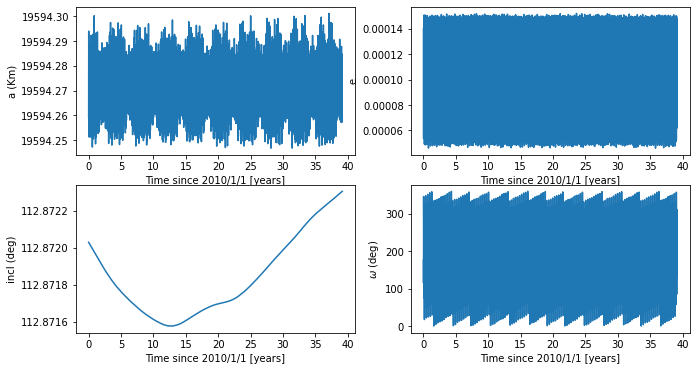

In [16]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['a']*uam/1000.)
plt.xlabel('Time since 2010/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['e'])
plt.xlabel('Time since 2010/1/1 [years]')
plt.ylabel('e')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['incl'])
plt.xlabel('Time since 2010/1/1 [years]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['w'])
plt.xlabel('Time since 2010/1/1 [years]')
plt.ylabel(r'$\omega$ (deg)')



plt.savefig('Charon2022.png')

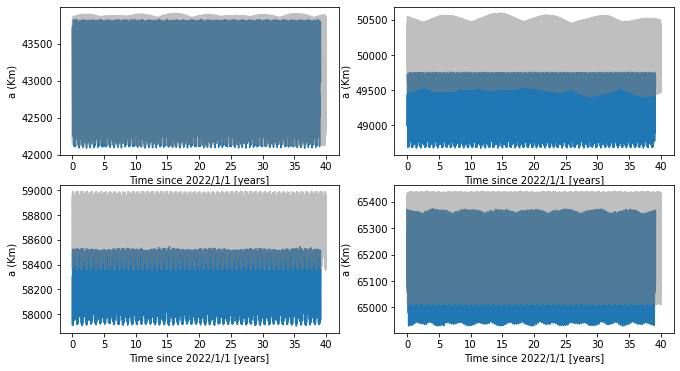

In [17]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('a (Km)')

plt.savefig('a-moons2022.png')

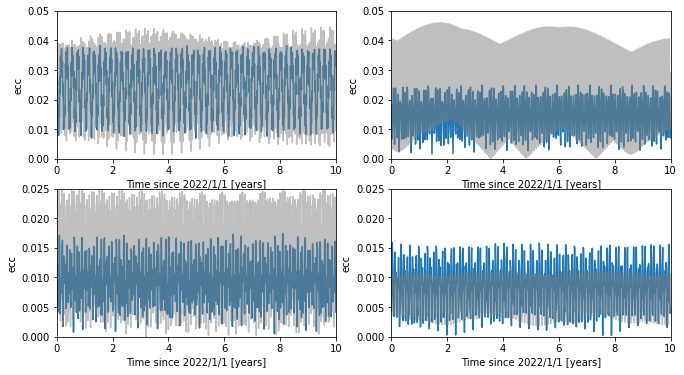

In [18]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('ecc')

plt.savefig('e-moons2022.png')

Text(0.5, 0, 'Time since 2022/1/1 [years]')

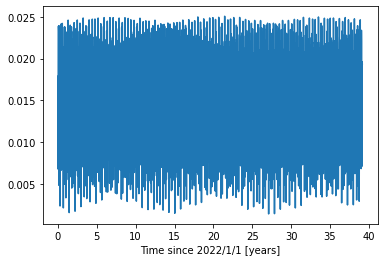

In [19]:

plt.plot(time,nix['e'])
plt.xlabel('Time since 2022/1/1 [years]')


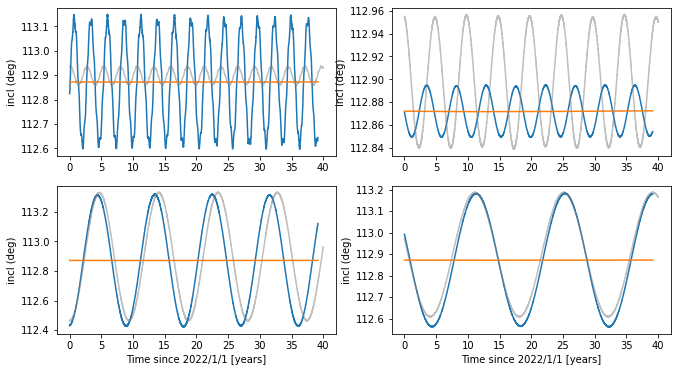

In [20]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.xlabel('')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.xlabel('')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel('incl (deg)')

plt.savefig('incl-moons2022.png')

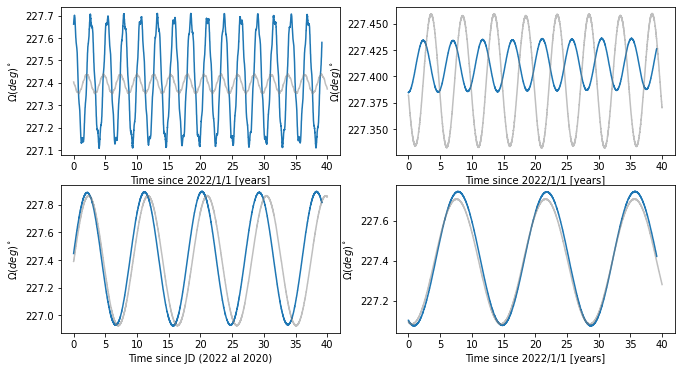

In [21]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['Omega'])
plt.plot(p1.t,p1.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['Omega'])
plt.plot(p2.t,p2.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['Omega'])
plt.plot(p3.t,p3.N, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2022 al 2020)')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['Omega'])
plt.plot(p4.t,p4.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel(r'$\Omega (deg)^\circ$')

plt.savefig('incl-moonsOmega2022.png')

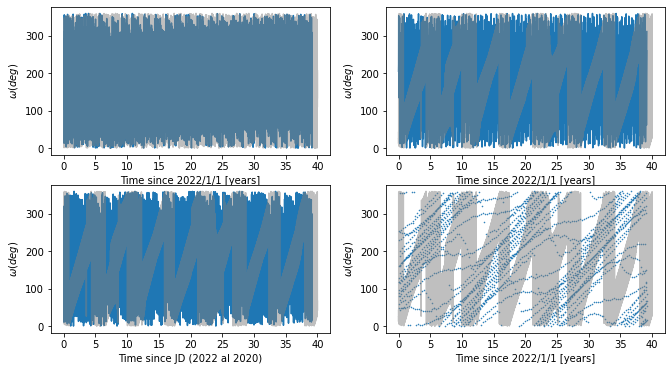

In [22]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['w'])
plt.plot(p1.t,p1.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['w'])
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['w'])
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2022 al 2020)')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.scatter(time,hyd['w'], s=0.3)
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [years]')
plt.ylabel(r'$\omega (deg)$')

plt.savefig('w-moons2022.png')

In [23]:
print ((np.max(sty['a'])-np.min(sty['a']))*uam/1000.,(np.max(nix['a'])-np.min(nix['a']))*uam/1000.,(np.max(ker['a'])-np.min(ker['a']))*uam/1000., (np.max(hyd['a'])-np.min(hyd['a']))*uam/1000.)
print ((np.max(sty['e'])-np.min(sty['e'])),(np.max(nix['e'])-np.min(nix['e'])),(np.max(ker['e'])-np.min(ker['e'])), (np.max(hyd['e'])-np.min(hyd['e'])))

print ((np.max(sty['incl'])-np.min(sty['incl'])),(np.max(nix['incl'])-np.min(nix['incl'])),(np.max(ker['incl'])-np.min(ker['incl'])), (np.max(hyd['incl'])-np.min(hyd['incl'])))

1737.1347460171912 1081.1860028378267 641.3670899200265 442.77331897634866
0.03145724239817281 0.023608677431556965 0.017035291492080832 0.015790822505473655
0.5524064122487005 0.04622833295809414 0.8988192268476922 0.6222394155729063


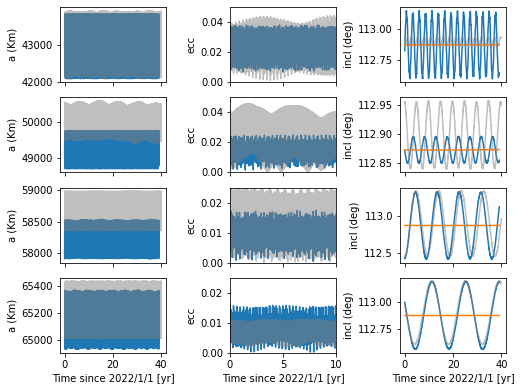

In [24]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [yr]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [yr]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2022/1/1 [yr]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('all-moons2022.png')


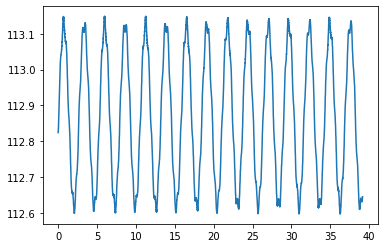

In [25]:
plt.plot(time,sty['incl'])


In [26]:
#test inclination.

### pluto center....sin sentido
objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objb = Horizons(id='Charon',  location='500@9'  ,epochs=epoch0,id_type='majorbody') #baricenter
objs = Horizons(id='Styx',    location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objn = Horizons(id='902',     location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objk = Horizons(id='Kerberos',location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objh = Horizons(id='Hydra',   location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# print(obj)
elb = objb.elements(refplane='ecliptic') 
elp = objp.elements(refplane='body')  # 999 solo si es pluto center no tiene sentido si es circumbinario
sty = objs.elements(refplane='body')  # 999 solo si es pluto center 
nix = objn.elements(refplane='body')  # 999 solo si es pluto center 
ker = objk.elements(refplane='body')  # 999 solo si es pluto center 
hyd = objh.elements(refplane='body')  # 999 solo si es pluto center 
# print(el)
# elp = objp.elements(refplane='body')
# sty = objs.elements(refplane='ecliptic')
# nix = objn.elements(refplane='ecliptic')
# ker = objk.elements(refplane='ecliptic')
# hyd = objh.elements(refplane='ecliptic')

In [27]:
print(elb['a'][0]*uam/1000.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0])
print(sty['a'][0]*uam/1000.,sty['e'][0],sty['incl'][0]-elb['incl'][0]+elp['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0])
print(nix['a'][0]*uam/1000.,nix['e'][0],nix['incl'][0]-elb['incl'][0]+elp['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0])
print(ker['a'][0]*uam/1000.,ker['e'][0],ker['incl'][0]-elb['incl'][0]+elp['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0])
print(hyd['a'][0]*uam/1000.,hyd['e'][0],hyd['incl'][0]-elb['incl'][0]+elp['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0])


17491.380187562005 0.001233303035813552 112.872030662746 1.715482879665339 340.6386209806046 227.4091741726797
19594.259115706427 0.0001400265379309957 0.0779586579094398 165.7565109315492 133.0078355897779 26.45328241820678
70708.66969899034 0.3993000074944578 -112.50309152272514 8.395189351871453 297.604043700355 67.48882804742117
43981.450658742586 0.1345577987926426 -112.72894714195074 241.6893849281205 133.0078355897779 11.51219596311646
50380.2431371699 0.1742601254579994 -112.33585646171699 235.4904341506734 133.0078355897779 158.3358681949187
165548.85486535277 0.599487283689772 -112.52386329641523 2.042090153262019 133.0078355897779 284.7547016242094
